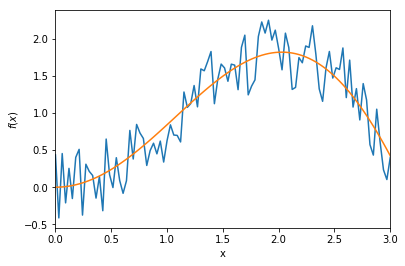

In [17]:
#Noisy data program
import matplotlib.pyplot as plt
import numpy as np

#define the function
f = lambda x: x * np.sin(x)  

#define the paramters for the plot
a,b = 0,3
npoints = 100
x = np.linspace(a,b,npoints)
y = f(x) + np.random.rand(npoints) - 0.5
plt.plot(x,y)
plt.plot(x,f(x))

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.show()

C:\Users\Van Cleave\Miniconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


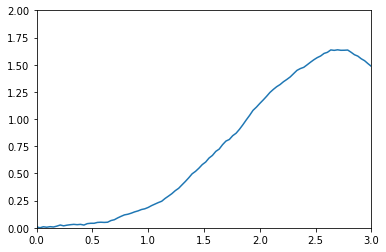

In [18]:
#function to help with noisy data. 
#raising number of 'n' will smooth the line
from scipy.signal import lfilter

n = 50
p = [1.0/n] * n
c = 1

yf = lfilter(p , c , y)

plt.plot(x, yf)
plt.xlim([a,b])
plt.ylim([0,2])
plt.show()

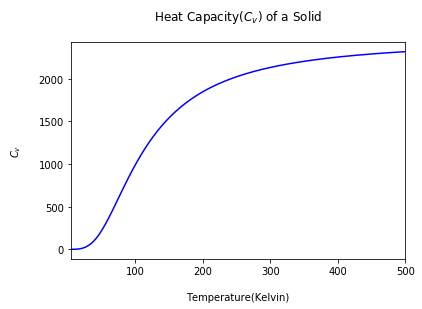

In [22]:
#Heat capacity of a solid calculation
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np

N = 495                    #Number of data points
T_initial = 5              #Initial temperature
T_final = 500              #Final temperature
V = 1/1000                 #Volume in m^3
A = 6.022 * 10**(28)       #Avogadros constant
D = 428                    #Debye temperature
K = 1.3806 * 10**(-23)     #Boltzmann constant

T_val = np.linspace(T_initial, T_final, N)
C_val = np.empty( [ N ] , float )
i = lambda x :(x**4*np.exp(x))/(np.exp(x)-1)**2

for j in range (N):
    I = quad(i , 0 , D/T_val[j])
    f = lambda T :(9*V*A*K*(T/D)**3)*I[0]
    C_val[j] = f(j)


plt.figure()
plt.plot(T_val, C_val, 'b')
plt.xlim( T_initial , T_final )
plt.xlabel('\nTemperature(Kelvin)')     
plt.ylabel('$C_v$\n')
plt.title('Heat Capacity($C_v$) of a Solid\n')
plt.show()


Slope = 1.9926464620104218 
Y-intercept = 5.463946427759208


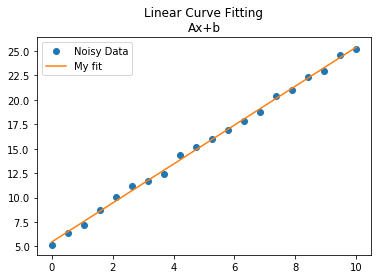

In [71]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: 2*x+7
x_min, x_max = 0,10
points = 20

slope = np.empty([points], float)
x = np.linspace(x_min, x_max, points)
y = f(x) + np.random.rand(points)  -2

m = ((np.mean(y)*np.mean(x)-np.mean(x*y))/
    (np.mean(x)**2-np.mean(x**2)))
b = np.mean(y)-m*np.mean(x)

print('Slope =', m, '\nY-intercept =',b)

myfit = lambda x: m * x + b

plt.plot(x,y,'o', label= 'Noisy Data')
plt.plot(x,myfit(x), label= 'My fit')
plt.legend()
plt.title('Linear Curve Fitting\nAx+b')
plt.show()
